In [7]:

from google.colab import files
uploaded = files.upload()


import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

df = pd.read_csv("churnBigMl20.csv")
# df.fillna(df.mean(numeric_only=True), inplace=True)  # OR: df.dropna(inplace=True)

label_encoder = LabelEncoder()
df["International plan"] = label_encoder.fit_transform(df["International plan"])
df["Voice mail plan"] = label_encoder.fit_transform(df["Voice mail plan"])

df = pd.get_dummies(df, columns=["State"], drop_first=True)

X = df.drop("Churn", axis=1)
y = df["Churn"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print("Train feature shape:", X_train.shape)
print("Test feature shape:", X_test.shape)
print("Train labels:", y_train.shape)
print("Test labels:", y_test.shape)



Saving churnBigMl20.csv to churnBigMl20 (2).csv
Train feature shape: (533, 68)
Test feature shape: (134, 68)
Train labels: (533,)
Test labels: (134,)


Saving 4) house Prediction Data Set.csv to 4) house Prediction Data Set (1).csv
Intercept: -36.24631889813795
Coefficient (slope): 9.348301406497727

R-squared: 0.3707569232254778
Mean Squared Error: 46.144775347317264


<ipython-input-9-c5ab80b4c399>:12: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv("4) house Prediction Data Set.csv", delim_whitespace=True, header=None)


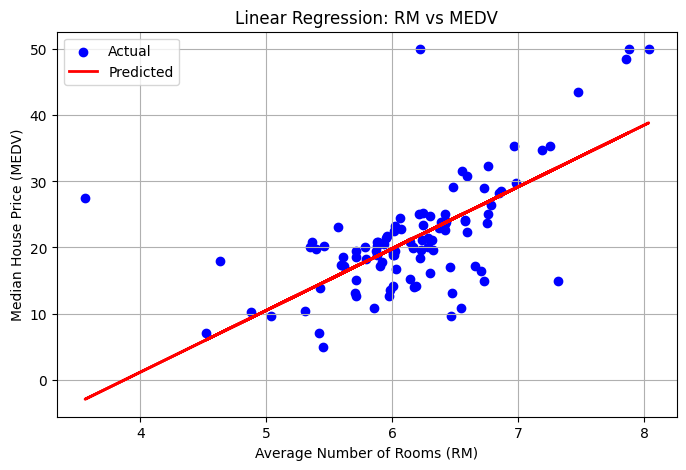

In [9]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from google.colab import files

uploaded = files.upload()

df = pd.read_csv("4) house Prediction Data Set.csv", delim_whitespace=True, header=None)

df.columns = [
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
    'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'
]


df.head()

X = df[['RM']]        # average number of rooms
y = df['MEDV']        # median value of homes

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)


print("Intercept:", model.intercept_)
print("Coefficient (slope):", model.coef_[0])

y_pred = model.predict(X_test)

# R-squared and Mean Squared Error
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("\nR-squared:", r2)
print("Mean Squared Error:", mse)

plt.figure(figsize=(8,5))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel("Average Number of Rooms (RM)")
plt.ylabel("Median House Price (MEDV)")
plt.title("Linear Regression: RM vs MEDV")
plt.legend()
plt.grid(True)
plt.show()


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, classification_report
import numpy as np
import io

# The provided data as a string
data = """0.00632  18.00   2.310  0  0.5380  6.5750  65.20  4.0900   1  296.0  15.30 396.90   4.98  24.00
0.02731   0.00   7.070  0  0.4690  6.4210  78.90  4.9671   2  242.0  17.80 396.90   9.14  21.60
0.02729   0.00   7.070  0  0.4690  7.1850  61.10  4.9671   2  242.0  17.80 392.83   4.03  34.70
0.03237   0.00   2.180  0  0.4580  6.9980  45.80  6.0622   3  222.0  18.70 394.63   2.94  33.40
0.06905   0.00   2.180  0  0.4580  7.1470  54.20  6.0622   3  222.0  18.70 396.90   5.33  36.20
0.02985   0.00   2.180  0  0.4580  6.4300  58.70  6.0622   3  222.0  18.70 394.12   5.21  28.70
0.08829  12.50   7.870  0  0.5240  6.0120  66.60  5.5605   5  311.0  15.20 395.60  12.43  22.90
0.14455  12.50   7.870  0  0.5240  6.1720  96.10  5.9505   5  311.0  15.20 396.90  19.15  27.10
0.21124  12.50   7.870  0  0.5240  5.6310 100.00  6.0821   5  311.0  15.20 386.63  29.93  16.50
0.17004  12.50   7.870  0  0.5240  6.0040  85.90  6.5921   5  311.0  15.20 386.71  17.10  18.90
0.22489  12.50   7.870  0  0.5240  6.3770  94.30  6.3467   5  311.0  15.20 392.52  20.45  15.00
0.11747  12.50   7.870  0  0.5240  6.0090  82.90  6.2267   5  311.0  15.20 396.90  13.27  18.90
0.09378  12.50   7.870  0  0.5240  5.8890  39.00  5.4509   5  311.0  15.20 390.50  15.71  21.70
0.62976   0.00   8.140  0  0.5380  5.9490  61.80  4.7075   4  307.0  21.00 396.90   8.26  20.40
0.63796   0.00   8.140  0  0.5380  6.0960  84.50  4.4619   4  307.0  21.00 380.02  10.26  18.20
0.62739   0.00   8.140  0  0.5380  5.8340  56.50  4.4986   4  307.0  21.00 395.62   8.47  19.90
1.05393   0.00   8.140  0  0.5380  5.9350  29.30  4.4986   4  307.0  21.00 386.85   6.58  23.10
0.78420   0.00   8.140  0  0.5380  5.9900  81.70  4.2579   4  307.0  21.00 386.75  14.67  17.50
0.80271   0.00   8.140  0  0.5380  5.4560  36.60  3.7965   4  307.0  21.00 288.99  11.69  20.20
0.72580   0.00   8.140  0  0.5380  5.7270  69.50  3.7965   4  307.0  21.00 390.95  11.28  18.20
1.25179   0.00   8.140  0  0.5380  5.5700  98.10  3.7979   4  307.0  21.00 376.57  21.02  13.60
0.85204   0.00   8.140  0  0.5380  5.9650  89.20  4.0123   4  307.0  21.00 392.53  13.83  19.60
1.23247   0.00   8.140  0  0.5380  6.1420  91.70  3.9769   4  307.0  21.00 396.90  18.72  15.20
0.98843   0.00   8.140  0  0.5380  5.8130 100.00  4.0952   4  307.0  21.00 394.54  19.88  14.50
0.75026   0.00   8.140  0  0.5380  5.9240  94.10  4.3996   4  307.0  21.00 394.33  16.30  15.60
0.84054   0.00   8.140  0  0.5380  5.5990  85.70  4.4546   4  307.0  21.00 303.42  16.51  13.90
0.67191   0.00   8.140  0  0.5380  5.8130  90.30  4.6820   4  307.0  21.00 376.88  14.81  16.60
0.95577   0.00   8.140  0  0.5380  6.0470  88.80  4.4534   4  307.0  21.00 306.38  17.28  14.80
0.77299   0.00   8.140  0  0.5380  6.4950  94.40  4.4547   4  307.0  21.00 387.94  12.80  18.40
1.00245   0.00   8.140  0  0.5380  6.6740  87.30  4.2390   4  307.0  21.00 380.23  11.98  21.00
1.13081   0.00   8.140  0  0.5380  5.7130  94.10  4.2330   4  307.0  21.00 360.17  22.60  12.70
1.35472   0.00   8.140  0  0.5380  6.0720 100.00  4.1750   4  307.0  21.00 376.73  13.04  14.50
1.38799   0.00   8.140  0  0.5380  5.9500  82.00  3.9900   4  307.0  21.00 232.60  27.71  13.20
1.15172   0.00   8.140  0  0.5380  5.7010  95.00  3.7872   4  307.0  21.00 358.77  18.35  13.10
1.61282   0.00   8.140  0  0.5380  6.0960  96.90  3.7598   4  307.0  21.00 248.31  20.34  13.50
0.06417   0.00   5.960  0  0.4990  5.9330  68.20  3.3603   5  279.0  19.20 396.90   9.68  18.90
0.09744   0.00   5.960  0  0.4990  5.8410  61.40  3.3779   5  279.0  19.20 377.56  11.41  20.00
0.08014   0.00   5.960  0  0.4990  5.8500  41.50  3.9342   5  279.0  19.20 396.90   8.77  21.00
0.17505   0.00   5.960  0  0.4990  5.9660  30.20  3.8473   5  279.0  19.20 393.43  10.13  24.70
0.02763  75.00   2.950  0  0.4280  6.5950  21.80  5.4011   3  252.0  18.30 395.63   4.32  30.80
0.03359  75.00   2.950  0  0.4280  7.0240  15.80  5.4011   3  252.0  18.30 395.62   1.98  34.90
0.12744   0.00   6.910  0  0.4480  6.7700   2.90  5.7209   3  233.0  17.90 385.41   4.84  26.60
0.14150   0.00   6.910  0  0.4480  6.1690   6.60  5.7209   3  233.0  17.90 383.37   5.81  25.30
0.15936   0.00   6.910  0  0.4480  6.2110   6.50  5.7209   3  233.0  17.90 394.46   7.44  24.70
0.12269   0.00   6.910  0  0.4480  6.0690  40.00  5.7209   3  233.0  17.90 389.39   9.55  21.20
0.17142   0.00   6.910  0  0.4480  5.6820  33.80  5.1004   3  233.0  17.90 396.90  10.21  19.30
0.18836   0.00   6.910  0  0.4480  5.7860  33.30  5.1004   3  233.0  17.90 396.90  14.15  20.00
0.22927   0.00   6.910  0  0.4480  6.0300  85.50  5.6894   3  233.0  17.90 392.74  18.80  16.60
0.25387   0.00   6.910  0  0.4480  5.3990  95.30  5.8700   3  233.0  17.90 396.90  30.81  14.40
0.21977   0.00   6.910  0  0.4480  5.6020  62.00  6.0877   3  233.0  17.90 396.90  16.20  19.40
0.08873  21.00   5.640  0  0.4390  5.9630  45.70  6.8147   4  243.0  16.80 395.56  13.45  19.70
0.04337  21.00   5.640  0  0.4390  6.1150  63.00  6.8147   4  243.0  16.80 393.97   9.43  20.50
0.05360  21.00   5.640  0  0.4390  6.5110  21.10  6.8147   4  243.0  16.80 396.90   5.28  25.00
0.04981  21.00   5.640  0  0.4390  5.9980  21.40  6.8147   4  243.0  16.80 396.90   8.43  23.40
0.01360  75.00   4.000  0  0.4100  5.8880  47.60  7.3197   3  469.0  21.10 396.90  14.80  18.90
0.01311  90.00   1.220  0  0.4030  7.2490  21.90  8.6966   5  226.0  17.90 395.93   4.81  35.40
0.02055  85.00   0.740  0  0.4100  6.3830  35.70  9.1876   2  313.0  17.30 396.90   5.77  24.70
0.01432 100.00   1.320  0  0.4110  6.8160  40.50  8.3248   5  256.0  15.10 392.90   3.95  31.60
0.15445  25.00   5.130  0  0.4530  6.1450  29.20  7.8148   8  284.0  19.70 390.68   6.86  23.30
0.10328  25.00   5.130  0  0.4530  5.9270  47.20  6.9320   8  284.0  19.70 396.90   9.22  19.60
0.14932  25.00   5.130  0  0.4530  5.7410  66.20  7.2254   8  284.0  19.70 395.11  13.15  18.70
0.17171  25.00   5.130  0  0.4530  5.9660  93.40  6.8185   8  284.0  19.70 378.08  14.44  16.00
0.11027  25.00   5.130  0  0.4530  6.4560  67.80  7.2255   8  284.0  19.70 396.90   6.73  22.20
0.12650  25.00   5.130  0  0.4530  6.7620  43.40  7.9809   8  284.0  19.70 395.58   9.50  25.00
0.01951  17.50   1.380  0  0.4161  7.1040  59.50  9.2229   3  216.0  18.60 393.24   8.05  33.00
0.03584  80.00   3.370  0  0.3980  6.2900  17.80  6.6115   4  337.0  16.10 396.90   4.67  23.50
0.04379  80.00   3.370  0  0.3980  5.7870  31.10  6.6115   4  337.0  16.10 396.90  10.24  19.40
0.05789  12.50   6.070  0  0.4090  5.8780  21.40  6.4980   4  345.0  18.90 396.21   8.10  22.00
0.13554  12.50   6.070  0  0.4090  5.5940  36.80  6.4980   4  345.0  18.90 396.90  13.09  17.40
0.12816  12.50   6.070  0  0.4090  5.8850  33.00  6.4980   4  345.0  18.90 396.90   8.79  20.90
0.08826   0.00  10.810  0  0.4130  6.4170   6.60  5.2873   4  305.0  19.20 383.73   6.72  24.20
0.15876   0.00  10.810  0  0.4130  5.9610  17.50  5.2873   4  305.0  19.20 376.94   9.88  21.70
"""

# Define column names based on Boston Housing dataset
# https://towardsdatascience.com/boston-housing-dataset-introduction-predicting-house-prices-linear-regression-with-tensorflow-and-keras-c18ee212670
column_names = [
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
    'PTRATIO', 'B', 'LSTAT', 'MEDV' # MEDV is the target variable (Median value of owner-occupied homes in $1000s)
]


df = pd.read_csv(io.StringIO(data), sep='\s+', names=column_names)


X = df.drop('MEDV', axis=1)
y = df['MEDV']


y_classified = pd.qcut(y, q=3, labels=['low', 'medium', 'high'])


X_train, X_test, y_train, y_test = train_test_split(X, y_classified, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


k_values = [3, 5, 7, 9, 11]

results = {}


for k in k_values:
    print(f"\n--- Evaluating KNN with K = {k} ---")
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)


    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    class_report = classification_report(y_test, y_pred, zero_division=0)


    results[k] = {
        'accuracy': accuracy,
        'confusion_matrix': conf_matrix,
        'precision': precision,
        'recall': recall,
        'classification_report': class_report
    }

    print(f"Accuracy: {accuracy:.4f}")
    print("Confusion Matrix:\n", conf_matrix)
    print("Classification Report:\n", class_report)


print("\n--- Summary of Results for Different K Values ---")
for k, metrics in results.items():
    print(f"K = {k}:")
    print(f"  Accuracy: {metrics['accuracy']:.4f}")
    print(f"  Precision (weighted): {metrics['precision']:.4f}")
    print(f"  Recall (weighted): {metrics['recall']:.4f}")
    print("-" * 20)

best_k = max(results, key=lambda k: results[k]['accuracy'])
print(f"\nBest K based on accuracy: {best_k} with Accuracy = {results[best_k]['accuracy']:.4f}")


--- Evaluating KNN with K = 3 ---
Accuracy: 0.4667
Confusion Matrix:
 [[2 0 1]
 [2 3 2]
 [2 1 2]]
Classification Report:
               precision    recall  f1-score   support

        high       0.33      0.67      0.44         3
         low       0.75      0.43      0.55         7
      medium       0.40      0.40      0.40         5

    accuracy                           0.47        15
   macro avg       0.49      0.50      0.46        15
weighted avg       0.55      0.47      0.48        15


--- Evaluating KNN with K = 5 ---
Accuracy: 0.4667
Confusion Matrix:
 [[2 0 1]
 [2 3 2]
 [2 1 2]]
Classification Report:
               precision    recall  f1-score   support

        high       0.33      0.67      0.44         3
         low       0.75      0.43      0.55         7
      medium       0.40      0.40      0.40         5

    accuracy                           0.47        15
   macro avg       0.49      0.50      0.46        15
weighted avg       0.55      0.47      0.48    